## EEP153 Project 1 - Team Greville

### Table of Contents
I. [Questions A, B, and C](#Questions)<br>
II. [Presentation Graphs](#Graphs)<br>

## Questions A, B, and C <a id='Questions'></a>

### Import necessary libraries

In [30]:
!pip install wbdata
import wbdata
import numpy as np
import pandas as pd
import cufflinks as cf
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
cf.go_offline()

### Create population function 
        
Takes in a given year, population parameter ("Male", "Female", "Everyone"), the minimum age, the maximum age, and the desired country (ex "USA" or "WLD" for world) an returns the counts of the given age groups aggregated in 5 year intervals

In [31]:
def population(year, population, low, high, location):
    age_ranges = []
    if high > 80:
        for i in range(low,80,5):
            age_ranges.append(f"{i:02d}"+f"{i+4:02d}")
        age_ranges.append("80UP")
    else:
        if high % 5 == 0:
            for i in range(low,high,5):
                age_ranges.append(f"{i:02d}"+f"{i+4:02d}")
        else:
            for i in range(low,high,5):
                age_ranges.append(f"{i:02d}"+f"{i+4:02d}")
    
    if population == "Male" or population == "Males":
        male_variables = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in age_ranges}
        variables = male_variables
    elif population == "Female" or population == "Females":
        female_variables = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in age_ranges}
        variables = female_variables
    else:
        male_variables = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in age_ranges}
        female_variables = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in age_ranges}
        variables = male_variables
        variables.update(female_variables)
        
    data = wbdata.get_dataframe(variables,country=location)
    data.reset_index(inplace=True)
    data['date'] = data['date'].astype(int)
    data.set_index(['date'],inplace=True)
    df = data.query("date=="+str(year))
    date_str = "date==" + str(year)
    print(df.query(date_str).sum(axis=0))
    
population(2008, "All", 15, 85, "GBR")

Males 1519      2055526.0
Males 2024      2107117.0
Males 2529      2029664.0
Males 3034      1993729.0
Males 3539      2167269.0
Males 4044      2329149.0
Males 4549      2183220.0
Males 5054      1877733.0
Males 5559      1834642.0
Males 6064      1764858.0
Males 6569      1353073.0
Males 7074      1132283.0
Males 7579       894554.0
Males 80UP      1020399.0
Females 1519    1972199.0
Females 2024    2067185.0
Females 2529    2028566.0
Females 3034    2011134.0
Females 3539    2207305.0
Females 4044    2382044.0
Females 4549    2228958.0
Females 5054    1909715.0
Females 5559    1879547.0
Females 6064    1830024.0
Females 6569    1448740.0
Females 7074    1276464.0
Females 7579    1108272.0
Females 80UP    1810474.0
dtype: float64


### Create population_df function 
        
Takes in a given year and the desired country (ex "USA" or "WLD" for world) and returns a one row dataframe of the counts of all ages aggreagted in 5 year groups

In [32]:
def population_df(year, location):
    age_ranges = []
    for i in range(0,80,5):
        age_ranges.append(f"{i:02d}"+f"{i+4:02d}")
    age_ranges.append("80UP")

    male_variables = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in age_ranges}
    female_variables = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in age_ranges}
    variables = male_variables
    variables.update(female_variables)
        
    df = wbdata.get_dataframe(variables,country="WLD")
    #final_df = pd.DataFrame(df, columns=["Population Age Range", "Population Count"])
    return df.loc[[str(year)],:]

population_df(2008, "GBR")

,Males 0004,Males 0509,Males 1014,Males 1519,Males 2024,Males 2529,Males 3034,Males 3539,Males 4044,Males 4549,...,Females 3539,Females 4044,Females 4549,Females 5054,Females 5559,Females 6064,Females 6569,Females 7074,Females 7579,Females 80UP
date,,,,,,,,,,,,,,,,,,,,,
2008,330870369.0,316287094.0,309906090.0,313386351.0,304771450.0,270286669.0,253155153.0,245625510.0,225156305.0,195970798.0,...,239607155.0,221241964.0,193690900.0,170498344.0,146017181.0,110758552.0,89109625.0,74622378.0,54260962.0,62058514.0


### Construct setup variables for population_pyramid
        
Creates a list of possible age ranges aggreagted at 5 year interval with the final group being 80 years and over, as well as creating the necessary male and female variables for the API

In [33]:
age_ranges = []
for i in range(0,80,5):
    age_ranges.append(f"{i:02d}"+f"{i+4:02d}")

age_ranges.append("80UP")

male_variables = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in age_ranges}
female_variables = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in age_ranges}

variables = male_variables
variables.update(female_variables)

df = wbdata.get_dataframe(variables,country="GBR")
df

,Males 0004,Males 0509,Males 1014,Males 1519,Males 2024,Males 2529,Males 3034,Males 3539,Males 4044,Males 4549,...,Females 3539,Females 4044,Females 4549,Females 5054,Females 5559,Females 6064,Females 6569,Females 7074,Females 7579,Females 80UP
date,,,,,,,,,,,,,,,,,,,,,
2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,2002151.0,2083573.0,1964877.0,1860465.0,2074980.0,2261807.0,2319836.0,2222680.0,2107164.0,2131817.0,...,2250685.0,2119619.0,2177219.0,2349587.0,2243179.0,1911026.0,1730542.0,1716036.0,1242301.0,2003644.0
2018,2015968.0,2076882.0,1917793.0,1873417.0,2095259.0,2268214.0,2297014.0,2188332.0,2092905.0,2168240.0,...,2211818.0,2109059.0,2219689.0,2358858.0,2190603.0,1858746.0,1770028.0,1654634.0,1209696.0,1991688.0
2017,2031768.0,2060487.0,1867936.0,1894805.0,2112753.0,2270083.0,2269216.0,2154975.0,2085423.0,2209684.0,...,2171731.0,2107285.0,2266416.0,2355574.0,2129646.0,1814041.0,1819689.0,1573916.0,1190379.0,1977415.0
2016,2049855.0,2030476.0,1824762.0,1915762.0,2127340.0,2265635.0,2237577.0,2124331.0,2087212.0,2246486.0,...,2135432.0,2115294.0,2307100.0,2338474.0,2066638.0,1785700.0,1853528.0,1495948.0,1177005.0,1958023.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2424299.0,2038602.0,1975872.0,2135784.0,1756696.0,1674812.0,1673939.0,1751103.0,1828729.0,1629697.0,...,1748410.0,1862950.0,1695815.0,1866507.0,1789035.0,1619527.0,1364130.0,1095953.0,812072.0,780908.0
1963,2388729.0,1967594.0,2043087.0,2073240.0,1724941.0,1661051.0,1678312.0,1793079.0,1780592.0,1665763.0,...,1798093.0,1819463.0,1739030.0,1874658.0,1776188.0,1592256.0,1341530.0,1084094.0,796477.0,768176.0
1962,2333842.0,1916887.0,2115562.0,1984936.0,1696996.0,1653593.0,1682542.0,1834635.0,1719962.0,1715725.0,...,1845988.0,1764443.0,1796954.0,1869410.0,1760713.0,1564118.0,1322460.0,1073873.0,780927.0,747601.0


### Create population_pyramid function
        
Creates a population pyramid using a dataframe corresponding to a given year and country or the world population

In [34]:
import plotly.offline as py
import plotly.graph_objs as go

py.init_notebook_mode(connected=True)


def population_pyramid(dataframe):
    layout = go.Layout(barmode='overlay',
                   yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                   xaxis=go.layout.XAxis(title='Number'))

    year = dataframe.index[0]

    bins = [go.Bar(x = dataframe.loc[str(year),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Men',
               marker=dict(color='purple'),
               hoverinfo='skip'
               ),

    go.Bar(x = -dataframe.loc[str(year),:].filter(regex="Female").values,
               y=[int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Women',
               marker=dict(color='pink'),
               hoverinfo='skip',
               )
        ]
    py.iplot(dict(data=bins, layout=layout))
    
population_pyramid(population_df(2008, "GBR"))

### Construct animated_population_pyramid function
        
Takes in a dataframe and creates an animated population pyramid showing the change in population over time in each decade from 1960 to 2018

In [35]:

def animated_population_pyramid(dataframe):

    # Count down by increments of 20 years
    years = range(2018,1960,-10)
    
    layout = go.Layout(barmode='overlay',
                   yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                   xaxis=go.layout.XAxis(title='Number'))

    # This makes a list of graphs, year by year
    bins = [go.Bar(x = df.loc[str(year),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Men {:d}'.format(year),
               hoverinfo='skip'
              )
            for year in years]
          
    bins += [go.Bar(x = -df.loc[str(year),:].filter(regex="Female").values,
                y=[int(s[:2])+1 for s in age_ranges],
                orientation='h',
                name='Women {:d}'.format(year),
                hoverinfo='skip',
               )
             for year in years]

    return py.iplot(dict(data=bins, layout=layout))
         
animated_population_pyramid(df)

## Presentation Graphs <a id='Graphs'></a>

### Population Growth Rate Graph 

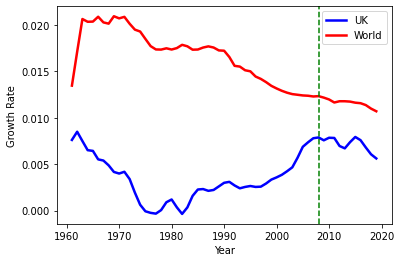

In [36]:

variable_labels = {"SP.POP.TOTL":"Population"}

# Three letter codes come from wbdata.get_country()
countries = {"WLD":"World",
             "GBR":"United Kingdom"
            }

df = wbdata.get_dataframe(variable_labels, country = countries).squeeze()

df = df.unstack('country')
# Date index is of type string; change to integers
df.index = df.index.astype(int)

# Differences (over time) in logs give us growth rates
new_df = np.log(df).diff()

# Useful arguments to pass include xTitle, yTitle, Title
fig, ax = plt.subplots()
sns.lineplot(data=new_df, x="date", y="United Kingdom", 
             label = 'UK', color='blue', linewidth=2.5, dashes=(5, 1), ax = ax)
sns.lineplot(data=new_df, x="date", y="World", 
             label = 'World', color='red', linewidth=2.5, ax = ax)
plt.axvline(x = 2008, color = 'green', linestyle = '--')
ax.set(xlabel='Year', ylabel='Growth Rate');


### Population Statistics gathering the data 

In [37]:

wbdata.search_countries("World")
#WLD 
wld_variable_labels = {"SP.DYN.LE00.IN":"World Life Expectancy at Birth", 
                   "SP.POP.DPND":"World Dependency Ratio",
                   "SP.RUR.TOTL.ZG":"World Rural Population Growth (Annual %)", 
                   "SP.URB.GROW":"World Urban Population Growth (Annual %)",
                    "NY.GDP.PCAP.CD": "GDP,Current US$"}
world = wbdata.get_dataframe(wld_variable_labels, country='WLD')
world.index = world.index.astype(int)
world = world.reset_index()
world = world.sort_values('date', ascending=True)
toPlot_world = world
toPlot_world

variable_labels = {"SP.DYN.LE00.IN":"Life Expectancy at Birth", 
                   "SP.POP.DPND":"Dependency Ratio",
                   "SP.RUR.TOTL.ZG":"Rural Population Growth (Annual %)", 
                   "SP.URB.GROW":"Urban Population Growth (Annual %)",
                   "NY.GDP.PCAP.CD": "GDP,Current US$"}
UK = wbdata.get_dataframe(variable_labels, country='GBR')
UK.index = UK.index.astype(int)

UK = UK.reset_index()
UK = UK.sort_values('date', ascending=True)
UK['Log GDP'] = np.log(UK['GDP,Current US$'])
toPlot_UK = UK.dropna(subset=['Log GDP'])
toPlot_UK.head()



,date,Life Expectancy at Birth,Dependency Ratio,Rural Population Growth (Annual %),Urban Population Growth (Annual %),"GDP,Current US$",Log GDP
60,1960,71.126829,53.664141,NaN,NaN,1397.594803,7.242508
59,1961,70.878049,54.215750,1.084669,0.671184,1472.385714,7.294639
58,1962,70.926829,54.431065,1.480164,0.673704,1525.775853,7.330258
57,1963,70.826829,54.481651,1.380460,0.571826,1613.456884,7.386134
56,1964,71.624390,54.643298,1.282931,0.472119,1748.288118,7.466392


### World vs UK GDP Graph

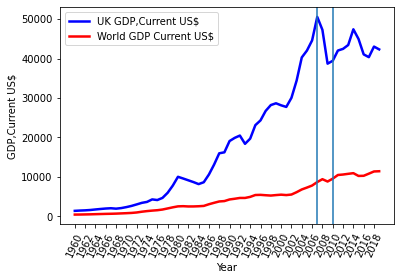

In [38]:
fig, ax = plt.subplots()
sns.lineplot(data=toPlot_UK, x='date', y ="GDP,Current US$", 
             label = 'UK GDP,Current US$', color='blue', linewidth=2.5, dashes=(5, 1), ax = ax)
sns.lineplot(data= toPlot_world, x='date', y="GDP,Current US$",
            label='World GDP Current US$', color = 'red', linewidth = 2.5, dashes=(5,1), ax=ax)

plt.xticks(np.arange(min(toPlot_UK['date']), max(toPlot_UK['date'])+1, 2), rotation = 65)
plt.axvline(x=2007)
plt.axvline(x=2010)
ax.set(xlabel='Year', ylabel='GDP,Current US$');

### World vs UK Life Expectancy Graph

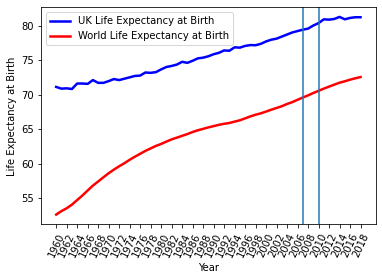

In [39]:
fig, ax = plt.subplots()
sns.lineplot(data=toPlot_UK,x='date', y = "Life Expectancy at Birth", 
             label = "UK Life Expectancy at Birth", color='blue', linewidth=2.5, dashes=(5, 1), ax = ax)
sns.lineplot(data=toPlot_world, x='date',y='World Life Expectancy at Birth',
            label = 'World Life Expectancy at Birth', color ='red', linewidth = 2.5, dashes=(5,1), ax=ax)

plt.xticks(np.arange(min(toPlot_UK['date']), max(toPlot_UK['date'])+1, 2), rotation = 65)
plt.axvline(x=2007)
plt.axvline(x=2010)
ax.set(xlabel='Year', ylabel='Life Expectancy at Birth');

### World vs UK Dependency Graph

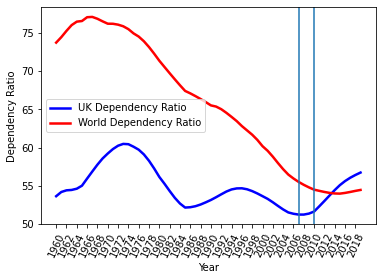

In [40]:
fig, ax = plt.subplots()
sns.lineplot(data=toPlot_UK, x= 'date', y = "Dependency Ratio", 
             label = "UK Dependency Ratio", color='blue', linewidth=2.5, dashes=(5, 1), ax = ax)
sns.lineplot(data=toPlot_world, x='date', y = "World Dependency Ratio", 
             label = "World Dependency Ratio", color='red', linewidth=2.5, dashes=(5, 1), ax = ax)

plt.xticks(np.arange(min(toPlot_UK['date']), max(toPlot_UK['date'])+1, 2), rotation = 65)
plt.axvline(x=2007)
plt.axvline(x=2010)
ax.set(xlabel='Year', ylabel='Dependency Ratio');

### World vs UK Rural And Urban Population Growth Rates Graph

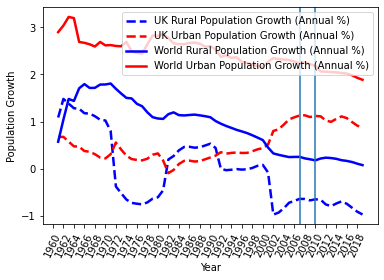

In [41]:
fig, ax = plt.subplots()
sns.lineplot(data=toPlot_UK, x="date", y="Rural Population Growth (Annual %)", 
             label = "UK Rural Population Growth (Annual %)", color='blue', linewidth=2.5, linestyle='--', dashes=(5, 1), ax = ax)
sns.lineplot(data=toPlot_UK, x="date", y="Urban Population Growth (Annual %)", 
             label = "UK Urban Population Growth (Annual %)", color='red', linewidth=2.5, linestyle='--', dashes=(5, 1), ax = ax)

sns.lineplot(data=toPlot_world, x="date", y="World Rural Population Growth (Annual %)", 
             label = "World Rural Population Growth (Annual %)", color='blue', linewidth=2.5, dashes=(5, 1), ax = ax)
sns.lineplot(data=toPlot_world, x="date", y="World Urban Population Growth (Annual %)", 
             label = "World Urban Population Growth (Annual %)", color='red', linewidth=2.5, dashes=(5, 1), ax = ax)


plt.axvline(x=2007)
plt.axvline(x=2010)
plt.xticks(np.arange(min(toPlot_UK['date']), max(toPlot_UK['date'])+1, 2), rotation = 65)
ax.set(xlabel='Year', ylabel='Population Growth');

### Construct Setup Variables for World vs UK Mortality Rates

In [42]:
# get variable labels for world mortality rates
variable_labels = {"SP.DYN.AMRT.MA":"World Male Mortality",
                  "SP.DYN.AMRT.FE":"World Female Mortality",
                  "NY.GDP.PCAP.CD":'GDP'}
#create world mortality df
WLD_Mortality = wbdata.get_dataframe(variable_labels, country="WLD")

# get variable labels for uk male mortality rates
variable_labels = {"SP.DYN.AMRT.MA":"United Kingdom Male Mortality"}

GBR_MA = wbdata.get_dataframe(variable_labels, country="GBR")

GBR_Mortality=GBR_MA.reset_index().merge

# get variable labels for uk female mortality rates
variable_labels = {"SP.DYN.AMRT.FE":"United Kingdom Female Mortality",
                  "NY.GDP.PCAP.CD":'GDP'}

GBR_FE = wbdata.get_dataframe(variable_labels, country="GBR")

# merge uk female and male mortality rates
GBR_Mortality=GBR_MA.reset_index().merge(GBR_FE.reset_index(), left_on = 'date', right_on = 'date')

WLD_Mortality = WLD_Mortality.reset_index()

# change data type of dates to integers
GBR_Mortality['date'] = (GBR_Mortality['date']).astype(int)
WLD_Mortality['date'] = (WLD_Mortality['date']).astype(int)


### World vs UK Female/Male Mortality Rates Graph

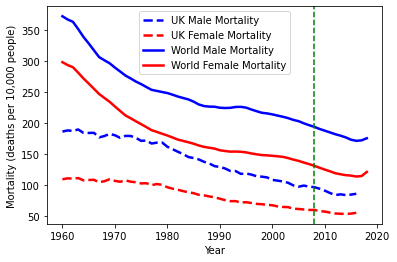

In [43]:

fig, ax = plt.subplots()
sns.lineplot(data=GBR_Mortality, x="date", y="United Kingdom Male Mortality", 
             label = 'UK Male Mortality', color='blue', linewidth=2.5, linestyle='--', dashes=(5, 1), ax = ax)
sns.lineplot(data=GBR_Mortality, x="date", y="United Kingdom Female Mortality", 
             label = 'UK Female Mortality', color='red', linewidth=2.5, linestyle='--', dashes=(5, 1), ax = ax)
sns.lineplot(data=WLD_Mortality, x="date", y="World Male Mortality", 
             label = 'World Male Mortality', color='blue', linewidth=2.5, ax = ax)
sns.lineplot(data=WLD_Mortality, x="date", y="World Female Mortality", 
             label = 'World Female Mortality', color='red', linewidth=2.5, ax = ax)
plt.axvline(x = 2008, color = 'green', linestyle = '--')

plt.xticks(np.arange(min(GBR_Mortality['date']), max(GBR_Mortality['date'])+1, 10))
ax.set(xlabel='Year', ylabel='Mortality (deaths per 10,000 people)');


### Construct Setup Variables for World vs UK Total Fertility Rates

In [44]:
# get variable names for uk tfr
variable_labels = {"SP.DYN.TFRT.IN":"United Kingdom Total Fertility Rate"}

# get data frame for uk tfr
GBR_FR = wbdata.get_dataframe(variable_labels, country="GBR")
GBR_FR = GBR_FR.reset_index()
#change years to integer
GBR_FR['date'] = GBR_FR['date'].astype(int)

# get variable names for world tfr
variable_labels = {"SP.DYN.TFRT.IN":"World Total Fertility Rate"}
WLD_FR = wbdata.get_dataframe(variable_labels, country="WLD")
WLD_FR = WLD_FR.reset_index()
#change years to integer
WLD_FR['date'] = WLD_FR['date'].astype(int)

### World vs UK Female/Male Total Fertility Rates Graph

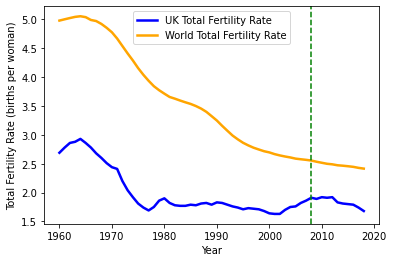

In [45]:

fig, ax = plt.subplots()
sns.lineplot(data=GBR_FR, x="date", y="United Kingdom Total Fertility Rate", 
             label = 'UK Total Fertility Rate', color='blue', linewidth=2.5, dashes=(5, 1), ax = ax)
sns.lineplot(data=WLD_FR, x="date", y="World Total Fertility Rate", 
             label = 'World Total Fertility Rate', color='orange', linewidth=2.5, ax = ax)

plt.axvline(x = 2008, color = 'green', linestyle = '--')

plt.xticks(np.arange(min(GBR_FR['date']), max(GBR_FR['date'])+1, 10))
ax.set(xlabel='Year', ylabel='Total Fertility Rate (births per woman)');

### World vs UK Population, Livestock, Food, and Crop Rates Graph

In [46]:
from plotly.offline import init_notebook_mode, iplot
import numpy as np
from scipy.optimize import newton

init_notebook_mode(connected=True)

# Play with these constants
## for exponential
P0 = 1
r = 0.02

## for line
F0 = 10
m = 100

food_production = lambda t,m=m: F0+m*t

population = lambda t,r=r: P0*np.exp(r*t)

diff = lambda t,r=r,m=m: food_production(t,m) - population(t,r)

# Point where curves cross

def choose_xaxis(r,m,x0=10):
    """
    Find a range of x so that curves intersect
    """
    tstar = -1
    try:
        while tstar <= 0:
            tstar = newton(lambda t: diff(t,r,m),x0,maxiter=1000)
            x0 = x0*10
        return np.linspace(0,tstar*1.1,100)
    except RuntimeError: # Failed to find root
        return np.linspace(0,1000,100)
    
import plotly.graph_objs as go
from ipywidgets import interactive, HBox, VBox

T = choose_xaxis(r,m)

data = [dict(name='Food production',
             #visible = False,
             line=dict(color='blue', width=6),
             x = T,
             y = [food_production(t) for t in T]),
        dict(name='Population',
             #visible = False,
             line=dict(color='red', width=6),
             x = T,
             y = [population(t) for t in T])]

layout = dict()

#fig = dict(data=data, layout=layout)
#plot(fig)

f = go.FigureWidget(data=data,layout=layout)

def update_pop(r,m):
    T = choose_xaxis(r,m)
    f.data[1].y = [population(t,r) for t in T]
    f.data[0].x = T
    f.data[1].x = T

r_slider = interactive(update_pop,r=(-0.05,0.08,.01),m=(0,200,10))
vb = VBox((f, r_slider))
vb.layout.align_items = 'center'
vb


import numpy as np
import wbdata
import cufflinks as cf
cf.go_offline()

def fix_date_index(df):
    idx_vars = df.index.names
    new = df.reset_index()
    new.date = new.date.astype(int)
    return new.set_index(idx_vars)


#get variables for livestock/food/crop index and overall population
vars = {"AG.PRD.LVSK.XD":"Livestock index",
        "AG.PRD.FOOD.XD":"Food index",
        "AG.PRD.CROP.XD":"Crop index",
        "SP.POP.TOTL":"Population"}

food_GBR = fix_date_index(wbdata.get_dataframe(vars,country='GBR'))

food_GBR

# calculate and plot growth rates using diff and log
np.log(food_GBR).diff().iplot(xTitle="Year",yTitle="Growth rates")
